## Project: Data Wrangling and Analysis
### Using tweets from Twitter user, WeRateDogs
This project is aimed at gathering, wrangling, and analyzing data from the Twitter archives of a Twitter user named *WeRateDogs*. This is a user who posts humorous reviews of people's dogs and rates them on a scale of ten. The tweets are more hilarious because the dogs are almost always rated a number above ten. Why, you ask? Because they're good dogs! Dogs are adorably cute pets. Would you really want to rate them less than 10? Don't be a hoodlum.

This project was divided into several tasks listed below:
1. **Gathering data from different sources:**
    * WeRateDogs sent their Twitter archive for use in this project. This archive contains basic tweet data as they stood on August 1, 2017.
    * Every image on WeRateDogs archive was run through a neural network to classify each dog breed type. This data is stored on Udacity's servers and was also downloaded for use in this project.
    * I also downloaded more data from WeRateDogs' Twitter archive through the Twitter API to get more information such as the number of likes and retweets that each post got.


2. **Assessing the data:** The data was assessed visually and programmatically in the Jupyter notebook to understand the data and identify areas that need cleaning. In summary, the data was assessed for quality (completeness, validity, accuracy, and consistency) and tidiness (data structure) issues that would affect the analysis.


3. **Cleaning the data:**
    * Copies of the datasets were made to keep track of changes made.
    * All data quality and tidiness issues identified while assessing the data were cleaned using the Define-Code-Test framework.
    
    
4. **Storing the data:** The cleaned dataset was stored in a new file which was used for the analysis.

5. **Analysis:** The analysis will give insights on the most liked dogs, dogs with the most retweets, any relationship between number of likes and retweets, top rated dogs and the dog breeds that get the highest number of likes.

6. **Reporting the data:** Documenting and reporting the data wrangling efforts and the insights and visualizations gleaned from the analysis.

### Data Gathering
Data was gathered from three different sources: the Twitter archive sent for use, the dataset of the neural network image prediction, and additional data pulled from the Twitter API for *WeRateDogs*. First, import all relevant packages needed for the project.
1. Import all packages. These are `pandas`, `numpy`, `seaborn`, `requests`, `os`, `json`, `tweepy`, `matplotlib`, `PIL`, `io`, `timeit` and `dotenv`. For reproducibility, one can `pip install --packagename` for any of the packages that do not exist in the environment.

In [1]:
# import above listed packages
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import os
import json
import tweepy
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
from io import BytesIO
from tweepy import OAuthHandler
from timeit import default_timer as timer
from dotenv import load_dotenv

2. Read the Twitter archive data sent into a pandas dataframe. This data is a csv file that can be downloaded for use [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

In [2]:
# load the archive data into a pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

3. Read the neural network prediction dataset. This data is available on Udacity's server and can be downloaded via the `requests` library. First, choose the folder to store the file. Second, download the file from the web. Third, store the file into the selected folder. Finally, read the file into a dataframe.

In [3]:
# choose the folder to store the file
folder_name = 'neural_net'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# download the file from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# save the file into the chosen folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
# load the file into a pandas dataframe
dog_breed = pd.read_csv('neural_net\image-predictions.tsv', sep='\t')

4. Use the `tweepy` library to access the Twitter API and get additional information about the tweets in the archive provided. Use the Twitter developer keys to authorise access to the API. Create an array of the tweet_ids from the archive and pull additional data about these tweet ids into a json file that will be read into another dataframe.

In [7]:
# get required keys stored in a private dotenv file
load_dotenv()
consumer_key = os.getenv('consumer_key')
consumer_secret = os.getenv('consumer_secret')
access_token = os.getenv('access_token')
access_secret = os.getenv('access_token_secret')

In [8]:
# authenticate your access to the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# create array of tweet ids from the archive which will be used to pull data from the API
tweet_ids = archive['tweet_id'].values

In [ ]:
# pull tweet data with a code that can track the progress, time elapsed and handle exceptions
# set functions to count ids, store failed runs, and start timer
count = 0
failed_runs = {}
start = timer()

# get data for every tweet id with a for loop and store in a file
with open('tweets.json', 'w') as file:
    for tweet_id in tweet_ids:
        count +=1
        print(str(count) + ': ' + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            failed_runs[tweet_id] = e
            pass
end = timer()
print('Elapsed time is: '+ str(end-start))
print(failed_runs)

In [10]:
# load this file into a pandas dataframe
# The file is a json line format
more_tweets = pd.read_json('tweets.json', lines=True)

### Data Assessment
The three dataframes, `archive`, `dog_breed`, and `more_tweets` are inspected visually and programmatically to identify any data cleaning procedures that need to be carried out.
#### Visual Assessment
##### Archive dataframe

In [11]:
#visual inspection of the archive dataframe
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`archive` columns:
* **tweet_id**: Unique key identifier for each tweet
* **in_reply_to_status_id**: The id of tweets in reply to another tweet
* **in_reply_to_user_id**: The id of the user whose tweet was replied
* **timestamp**: Time of tweet
* **source**: URL of tweet source
* **text**: Text contained in the tweet
* **retweeted_status_id**: The id of a retweet
* **retweeted_status_user_id**: The user id of the Twitter user who retweeted
* **retweeted_status_timestamp**: Time of retweet
* **expanded_urls**: Expanded URL of tweet
* **rating_numerator**: Rating score of the dog
* **rating_denominator**: Rating scale - which is over 10
* **name**: Dog name
* **doggo**: A dog stage. Defined as a big "pupper" who appears to have its life in order and probably understands taxes.
* **floofer**: A dog stage. Defined as a label given usually to dogs with seemingly excess fur
* **pupper**: A dog stage. Defined as a small "doggo" who is inexperienced or unprepared for the responsibilities associated with being a doggo
* **puppo**: A dog stage. Defined as the transitional stage between a "doggo" and a "pupper". The dog equivalent of a teenager.

<h4 style="color:red;"> Issues (visual inspection of archive):</h4>

1. Some dog names are inaccurately listed as "a", "the", "one" or "quite".
2. The information in the `doggo`, `floofer`, `pupper` and `puppo` columns should be in **one** column called `dog_stage`.
3. The none values in the `name` column need to be changed to `null` values.

##### Dog_breed dataframe

In [12]:
# visual inspection of the dog_breed dataframe
dog_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`dog_breed` columns:
* **tweet_id**: Unique key identifier for each tweet. Foreign key in this dataset that can be used to connect to the archive dataset.
* **jpg_url**: URL to download the images
* **img_num**: Image number that corresponds to the most confident prediction; tweets can have up to 4 images
* **p1**: the algorithm's first most likely prediction
* **p1_conf**: how confident the algorithm is in its first prediction
* **p1_dog**: Whether or not the first prediction is a breed of dog
* **p2**: the algorithm's second most likely prediction
* **p2_conf**: how confident the algorithm is in its second prediction
* **p2_dog**: whether or not the second prediction is a breed of dog
* **p3**: the algorithm's third most likely prediction
* **p3_conf**: how confident the algorithm is in its third prediction
* **p3_dog**: whether or not the third prediction is a breed of dog

<h4 style="color:red;"> Issues (visual inspection of dog_breed):</h4>

1. There should be a column that contains the most accurate dog breed prediction for each tweet

##### More_tweets dataframe

In [13]:
# visual inspection of the more_tweets dataframe
more_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2322,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


While there is a lot of data in this dataset, we are interested in the number of likes and retweets in this dataset which currently cannot be inspected visually in pandas due to the total number of columns in the dataset. This dataset and the other two will be inspected programmatically going forward.
<h4 style="color:red;"> Issues (summary of more_tweets dataset):</h4>

1. Rename the `id` column to `tweet_id` to match the column name in the `archive` and `dog_breed` dataset.

#### Programmatic Assessment
##### `archive` dataframe

In [14]:
# concise summary of the archive dataframe
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<h4 style="color:red;"> Issues (summary of archives dataset):</h4>

1. There are 181 retweets present in the dataset that should be removed.
2. Timestamps should be in datetime format not string
3. All ids should be strings. No calculations will be performed on them.
4. Columns irrelevant to the analysis will be dropped. These include `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `expanded_urls`.

In [15]:
# summary statistics of the archive dataframe
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Rating is on a scale of 10, so `rating_denominator` should be 10. However, there is a minimum value of 0 and a maximum value of 170. Confirm the other denominator values apart from 10.

In [16]:
# check and count rating_denominator values
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Some of the other numbers are multiples of 10 while others are not. The multiples of 10 are likely accurate and is a rating for a group of dogs while the others are inaccurate. However, for easier analysis, only ratings with a denominator of 10 will be considered.
<h4 style="color:red;"> Issues (statistics summary of archives dataset):</h4>

1. Not all rating denominators are the value 10.

In [17]:
# check for duplicate values
sum(archive.duplicated())

0

##### `more_tweets` dataframe

In [18]:
# concise summary of the more_tweets dataframe
more_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   id                             2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
# crosscheck for duplicate tweet ids
sum(more_tweets.id.duplicated())

0

<h4 style="color:red;"> Issues (summary of more_tweets dataset):</h4>

1. Merge the `retweet_count` and `favorite_count` from the `more_tweets` dataframe with the `archive` dataframe using the tweet ids, keeping only tweets with data on number of likes and retweets.

##### `dog_breed` dataframe

In [20]:
# concise summary of the dog_breed dataframe
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h4 style="color:red;"> Issues (summary of dog_breed dataset):</h4>

1. `tweet_id` and `img_num` should be strings
2. Merge select columns in the dog_breed dataset with the `archive` and `more_tweets` dataset to create a master dataframe with data needed for the analysis

In [21]:
# summary statistics of the dog breed dataframe
dog_breed.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# check for duplicates
sum(dog_breed.duplicated())

0

All issues identified in the three dataframes (archive, dog_breed, and more_tweets) are listed and categorised below as either **quality (completeness, validity, accuracy, consistency)** or **tidiness (data structure)** issues.
<h4 style="color:red;"> Quality Issues:</h4>

##### Completeness:
1. There should be a column that selects the most accurate dog breed prediction from `p1`, `p2`, and `p3` in the `dog_breed` dataset

##### Validity:
2. Null values in the `name` column of the `archive` dataset are represented as strings "None".
3. Timestamps in the `archive` should be in datetime format not strings
4. All ids in the `archive` dataset should be strings. Numeric formats are for observations where calculations will be performed
5. The `id` column of the `more_tweets` dataset should be changed from a numeric datatype to a string.
6. `tweet_id` and `img_num` in the `dog_breed` dataset should be strings not numeric formats

##### Accuracy:
7. Some dog names in the `archive` dataset are inaccurately listed as "a".
8. Remove retweets from the `archive` dataset. They represent duplicate tweets

##### Consistency:
9. Rename the `id` column in the `more_tweets` dataset to `tweet_id` to match the column name in the other two datasets
10. Ratings in the `archive` dataset should be on a scale of ten.

<h4 style="color:red;"> Tidiness Issues:</h4>

11. The observations in the `doggo`, `floofer`, `pupper`, and `puppo` columns of the `archive` dataset should be in **one** column which will be a categorical datatype
12. `retweet_count` and `favorite_count` in the `more_tweets` dataset should be part of the `archive` dataset.
13. Merge selected columns in the different datasets to create a master dataframe with cleaned data for the analysis.

### Data Cleaning
First, we make a copy of the three dataframes for cleaning. We address quality issues first, and afterwards, tidiness issues.

In [23]:
# make copies of the original dataframes
archive_clean = archive.copy()
breed_clean = dog_breed.copy()
tweets_clean = more_tweets.copy()

#### Issue 1: Include a column that selects the most accurate dog breed prediction in the dog breed dataset
##### Define:
We want to select the dog breed with the most confident prediction. From visual assessments, there are cases when the most confident prediction is not a dog breed. We create columns for:
* Predictions with the highest confidence between `p1_conf`, `p2_conf`, and `p3_conf`.
* Predictions with higher confidence between `p2_conf` and `p3_conf`.

Using `np.select`, we then create a `dog_breed` column such that:
1. if `p1_conf` has the highest confidence and it is a correct dog breed (`p1_dog` is True), it returns `p1`, 
2. else if `p2_conf` is the higher of `p2_conf` and `p3_conf` and it corresponds to a correct dog breed (`p2_dog` is True), it returns `p2`,
3. else it returns `p3` if it is a correct dog breed(`p3_dog` is True).

If none of these conditions hold and no prediction is a correct dog breed, it returns a default null (`np.nan`) value.
##### Code:

In [24]:
# create a column with the most confident prediction
breed_clean['highest_conf'] = breed_clean[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)

#create a column for the second highest prediction
breed_clean['higher_conf'] = breed_clean[['p2_conf', 'p3_conf']].max(axis=1)

In [25]:
# create conditions where prediction is highest and is a dog breed
# otherwise choose between the other predictions so long as it is a dog breed
# else return null
conditions = [breed_clean['highest_conf'].eq(breed_clean['p1_conf']) & breed_clean['p1_dog'].eq(True),
             breed_clean['higher_conf'].eq(breed_clean['p2_conf']) & breed_clean['p2_dog'].eq(True),
             breed_clean['p3_dog'].eq(True)]

In [26]:
# choose choices for each respective condition above
choices = [breed_clean['p1'], breed_clean['p2'], breed_clean['p3']]

In [27]:
# create a dog breed column that chooses dog breed based on the conditions and choices listed above
breed_clean['dog_breed'] = np.select(conditions, choices, default=np.nan)

##### Test:

In [28]:
# check the new column created
breed_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,highest_conf,higher_conf,dog_breed
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False,0.519047,0.296069,kelpie
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True,0.878822,0.018570,Chesapeake_Bay_retriever
1241,747103485104099331,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,Labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False,0.991954,0.002228,Labrador_retriever
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,0.506312,0.295690,Tibetan_mastiff
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,0.322084,0.287955,curly-coated_retriever


#### Issue 2: Null values in the `name` column of the `archive` dataset are represented as strings "None".
##### Define:
Replace all "None" values in the `name` column with the default and acceptable null values `np.nan` using the `replace` function.
##### Code:

In [29]:
# replace "None" row values with null values
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

##### Test:

In [30]:
# check if there are still rows with the values "None" in the name column
archive_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
# confirm that there are null values within the name column
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       2356 

#### Issue 3: Timestamps in the `archive` should be in datetime format not strings
##### Define:
Change the datatype of `timestamp` and `retweeted_status_timestamp` from strings to the acceptable datetime format using the `to_datetime` function.
##### Code:

In [32]:
# change the timestamps datatype to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

##### Test:

In [33]:
# check the new datatypes
print(archive_clean['timestamp'].dtypes)
print(archive_clean['retweeted_status_timestamp'].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


#### Issue 4: All ids in the archive dataset should be strings. 
##### Define:
Numeric formats are for observations where calculations will be performed. Change the datatype of `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` from integers and floats to strings using the `astype` function.

Null values will be converted to a string and written as "nan". We will need to replace these "nan" values with the correct null (`np.nan`) values.
##### Code:

In [34]:
# change the ids in archives to a string and ensure that null values remain null
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str).replace('nan', np.nan)
archive_clean['in_reply_to_status_id'] = archive_clean['in_reply_to_status_id'].astype(str).replace('nan', np.nan)
archive_clean['in_reply_to_user_id'] = archive_clean['in_reply_to_user_id'].astype(str).replace('nan', np.nan)
archive_clean['retweeted_status_id'] = archive_clean['retweeted_status_id'].astype(str).replace('nan', np.nan)
archive_clean['retweeted_status_user_id'] = archive_clean['retweeted_status_user_id'].astype(str).replace('nan', np.nan)

##### Test:

In [35]:
# confirm the changed datatype
archive_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

#### Issue 5: The id column of the more_tweets dataset should be changed from a numeric datatype to a string.
##### Define:
Change the `id` datatype in the `more_tweets` dataset to a string using the `astype` function.
##### Code:

In [36]:
# change id to a string
tweets_clean['id'] = tweets_clean['id'].astype(str)

##### Test:

In [37]:
# confirm new datatype
tweets_clean['id'].dtypes

dtype('O')

#### Issue 6: `tweet_id` and `img_num` in the dog_breed dataset should be strings not numeric formats
##### Define:
Change the datatype of the `tweet_id` and `img_num` in the dog breed dataset to strings using the `astype` function.
##### Code:

In [38]:
# change image number and tweed id in the dog breed prediction dataset to strings
breed_clean['img_num'] = breed_clean['img_num'].astype(str)
breed_clean['tweet_id'] = breed_clean['tweet_id'].astype(str)

##### Test:

In [39]:
# confirm the change in datatypes
breed_clean['img_num'].dtypes

dtype('O')

In [40]:
# confirm the change in datatypes
breed_clean['tweet_id'].dtypes

dtype('O')

#### Issue 7: Some dog names in the `archive` dataset are inaccurately listed as "a", "the", "one" or "quite".
##### Define:
Select all rows where the `name` is listed as "a", "the", "one" or "quite" and replace with null values (`np.nan`) using the `replace` function.
##### Code:

In [41]:
# replace dog names of "a", "the", "one", and "quite" with null values
archive_clean['name'] = archive_clean['name'].replace('a', np.nan)
archive_clean['name'] = archive_clean['name'].replace('the', np.nan)
archive_clean['name'] = archive_clean['name'].replace('one', np.nan)
archive_clean['name'] = archive_clean['name'].replace('quite', np.nan)

##### Test:

In [48]:
# test to ensure that there are no "a" dog names
archive_clean.query('name == "a" or name == "the" or name == "one" or name == "quite"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue 8: Remove retweets from the `archive` dataset. They represent duplicate tweets
##### Define:
Select and keep only rows whose observations are original tweets, not retweets. That is, select and keep rows where the retweeted_status_id `isnull()`.
##### Code:

In [43]:
# keep rows that are not retweets
archive_clean = archive_clean.loc[archive_clean['retweeted_status_id'].isnull()]

##### Test:

In [44]:
# test that there are no retweets in the dataframe
sum(archive_clean['retweeted_status_id'].notnull())

0

#### Issue 9: Rename the `id` column in the `more_tweets` dataset to `tweet_id` to match the column name in the other two datasets
##### Define:
Use the `rename` function to rename the column and `inplace=True` to overwrite the existing column name
##### Code:

In [45]:
# rename the id column in more tweets dataset to tweet id
tweets_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

##### Test:

In [46]:
#check the column names
list(tweets_clean.columns)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status']

#### Issue 10: Ratings in the `archive` dataset should be on a scale of ten.
##### Define:
Select and keep the rows whose ratings are on a scale of ten by querying the dataset. That is, `rating_denominator` is 10.

In [47]:
# keep rows with ratings on a scale of ten
archive_clean = archive_clean.query('rating_denominator == 10')

##### Test:

In [49]:
# confirm that there are only ratings on a scale of ten
archive_clean['rating_denominator'].value_counts()

10    2153
Name: rating_denominator, dtype: int64

#### Issue 11: The observations in the `doggo`, `floofer`, `pupper`, and `puppo` columns of the `archive` dataset should be in one column
##### Define:
The current data structure with seperate columns for each dog stage observation is improper. The observations in these columns are all strings. They will be concatenated to form one column using `agg` and `join`. The appropriate dog_stage will be extracted using `str.extract()`. Where there are no dog_stage values, it will be written as null values.
##### Code:

In [50]:
# create one column that concatenates values from all dog stages column
archive_clean['dog_stage'] = archive_clean[['doggo','floofer','pupper','puppo']].agg(' '.join, axis=1)

In [51]:
# extract the correct dog stages from the joined strings
archive_clean['dog_stage'] = archive_clean.dog_stage.str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [52]:
# change dog stage datatype to category
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

In [53]:
# drop the doggo, floofer, pupper, and puppo columns
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

##### Test:

In [54]:
# check all values within dog stage column
archive_clean['dog_stage'].value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_stage, dtype: int64

In [55]:
# confirm summary statistics
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   object             
 1   in_reply_to_status_id       73 non-null     object             
 2   in_reply_to_user_id         73 non-null     object             
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

#### Issue 12: retweet_count and favorite_count in the more_tweets dataset should be part of the archive dataset.
##### Define:
Create a dataframe from the `tweets` dataframe that contains only the tweet id, favorite_count, and retweet_count. Merge this new dataframe with the `archives` dataframe using an inner join
##### Code:

In [56]:
# create new dataframe containing the tweet id, retweet count and favorite count from the tweets data
tweets_tomerge = tweets_clean.loc[:,['tweet_id','retweet_count','favorite_count']]

In [57]:
# merge number of likes and retweets from tweets with archive data
archive_clean = archive_clean.merge(tweets_tomerge, how='inner', on='tweet_id')

##### Test:

In [58]:
# confirm new columns in the archive dataset
list(archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count']

#### Issue 13: Merge selected columns in the different datasets to create a master dataframe with cleaned data for the analysis.
##### Define:
Create a dataframe with `tweet_id`, `timestamp`, `text`, `expanded_urls`, `rating_numerator`, `rating_denominator`, `name`, `dog_stage`, `retweet_count`, and `favorite_count` from the `archive` datasets. 

Create another dataframe with `tweet_id`. `jpg_url`, `img_num`, and `dog_breed` from the `dog_breed` dataset. Merge these dataframes with the `tweet_id` to create one master dataframe that will be used in the analysis.
##### Code:

In [59]:
# check column indexes in the archive dataset
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2143
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2144 non-null   object             
 1   in_reply_to_status_id       73 non-null     object             
 2   in_reply_to_user_id         73 non-null     object             
 3   timestamp                   2144 non-null   datetime64[ns, UTC]
 4   source                      2144 non-null   object             
 5   text                        2144 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2090 non-null   object             
 10  rating_numerator            2144 non-null   int64           

In [60]:
# create dataframe of tweet id, timestamp, text, expanded urls, rating numerator, rating denominator, name,
# dog stage, retweet count, and favorite count from archive dataset
master_df = archive_clean.iloc[:,[0,3,5,9,10,11,12,13,14,15]]

In [61]:
# check column indexes in the dog breed dataset
breed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   object 
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   object 
 3   p1            2075 non-null   object 
 4   p1_conf       2075 non-null   float64
 5   p1_dog        2075 non-null   bool   
 6   p2            2075 non-null   object 
 7   p2_conf       2075 non-null   float64
 8   p2_dog        2075 non-null   bool   
 9   p3            2075 non-null   object 
 10  p3_conf       2075 non-null   float64
 11  p3_dog        2075 non-null   bool   
 12  highest_conf  2075 non-null   float64
 13  higher_conf   2075 non-null   float64
 14  dog_breed     1751 non-null   object 
dtypes: bool(3), float64(5), object(7)
memory usage: 200.7+ KB


In [62]:
# create dataframe of tweet id, jpg url, img num, and dog breed from dog breed dataset
neural_net = breed_clean.iloc[:,[0,1,2,14]]

In [63]:
# merge neural net with the master_df using tweet id
master_df = master_df.merge(neural_net, on='tweet_id')

##### Test:

In [64]:
# concise summary of master dataframe
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1967 non-null   object             
 1   timestamp           1967 non-null   datetime64[ns, UTC]
 2   text                1967 non-null   object             
 3   expanded_urls       1967 non-null   object             
 4   rating_numerator    1967 non-null   int64              
 5   rating_denominator  1967 non-null   int64              
 6   name                1366 non-null   object             
 7   dog_stage           304 non-null    category           
 8   retweet_count       1967 non-null   int64              
 9   favorite_count      1967 non-null   int64              
 10  jpg_url             1967 non-null   object             
 11  img_num             1967 non-null   object             
 12  dog_breed           1661 non-null 

In [65]:
# sample of master dataframe
master_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed
1013,706265994973601792,2016-03-05 23:51:49+00:00,This is Kara. She's been trying to solve that ...,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,NaN,852,2527,https://pbs.twimg.com/media/Cc0pLU0WAAEfGEw.jpg,1,papillon
680,753420520834629632,2016-07-14 02:47:04+00:00,Here we are witnessing an isolated squad of bo...,https://twitter.com/dog_rates/status/753420520...,11,10,NaN,NaN,3239,7361,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,NaN
415,801958328846974976,2016-11-25 01:18:59+00:00,This is Ronnie. He hopes you're having a great...,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,NaN,1598,7371,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier
443,796031486298386433,2016-11-08 16:47:50+00:00,This is Daisy. She's here to make your day bet...,https://twitter.com/dog_rates/status/796031486...,13,10,Daisy,NaN,3504,10283,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever
1851,668154635664932864,2015-11-21 19:50:53+00:00,Fun dogs here. Top one clearly an athlete. Bot...,https://twitter.com/dog_rates/status/668154635...,9,10,NaN,NaN,273,440,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,NaN


### Data Storage
The data cleaning has been completed and this new master dataframe is saved to a new csv file named "twitter_archive_master.csv".

In [66]:
# save the new dataframe to a csv file
master_df.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis
The analysis will give insights on
* top ten liked dogs,
* top ten dogs with the most retweets,
* relationship between number of likes and retweets,
* top ten rated dogs, and
* top five dog breeds that get the highest number of likes.

### 1. Top Ten Liked Dogs
The dataframe is sorted with the `favorite_count` in descending order and the tweets with the top ten number of likes (`favorite_count`) are selected. 

*Where dogs are unnamed, the dog breed or tweet id is used as proxy.*

In [67]:
# sort dataframe by favorite_count
likes = master_df.sort_values(by='favorite_count', axis=0, ascending=False, ignore_index=True)

In [68]:
# select tweet id, name, favorite count, dog breed, and jpg url columns
likes = likes.loc[:,['tweet_id','name','favorite_count','dog_breed','jpg_url']]

In [69]:
# select top ten rows
top_ten_likes = likes.iloc[0:10]
top_ten_likes

,tweet_id,name,favorite_count,dog_breed,jpg_url
0,744234799360020481,NaN,144938,Labrador_retriever,https://pbs.twimg.com/ext_tw_video_thumb/74423...
1,822872901745569793,NaN,124149,Lakeland_terrier,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
2,807106840509214720,Stephan,111739,Chihuahua,https://pbs.twimg.com/ext_tw_video_thumb/80710...
3,866450705531457537,Jamesy,108945,French_bulldog,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
4,739238157791694849,NaN,107290,Eskimo_dog,https://pbs.twimg.com/ext_tw_video_thumb/73923...
5,879415818425184262,Duddles,92910,English_springer,https://pbs.twimg.com/ext_tw_video_thumb/87941...
6,819004803107983360,Bo,82732,standard_poodle,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
7,859196978902773760,NaN,80631,malamute,https://pbs.twimg.com/ext_tw_video_thumb/85919...
8,870374049280663552,Zoey,73986,golden_retriever,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
9,678399652199309312,NaN,73545,Bedlington_terrier,https://pbs.twimg.com/ext_tw_video_thumb/67839...


In [70]:
# save the pictures of these top liked dogs
i = list(range(10))
top_liked_images_folder = 'top_likes'
if not os.path.exists(top_liked_images_folder):
    os.makedirs(top_liked_images_folder)
for i in list(top_ten_likes.index.values):
    likes_url = top_ten_likes['jpg_url'][i]
    likes = requests.get(likes_url)
    likes_im = Image.open(BytesIO(likes.content))
    likes_im.save(top_liked_images_folder + "/" + "like_" + str(i) + '.' + 'jpg')

The top ten most liked dogs are, respectively, **a labrador retriever, a lakeland terrier, Stephan, Jamesy, an eskimo dog, Duddles, Bo, a malamute, Zoey, and a bedlington terrier.** Their pictures are shown in the insights report
### 2. Top Ten Dogs with the Most Retweets
The dataframe is sorted with the `retweet_count` in descending order and the tweets with the top ten retweets (`retweet_count`) are selected.

*Where dogs are unnamed, the dog breed or tweet id is used as proxy.*

In [71]:
# sort dataframe by retweet count
retweets = master_df.sort_values(by='retweet_count', axis=0, ascending=False, ignore_index=True)

In [72]:
# select tweet id, name, retweet count, dog breed and jpg_url columns
retweets = retweets.loc[:,['tweet_id','name','retweet_count','dog_breed','jpg_url']]

In [73]:
# select top ten rows
top_ten_retweets = retweets.iloc[0:10]
top_ten_retweets

,tweet_id,name,retweet_count,dog_breed,jpg_url
0,744234799360020481,NaN,70776,Labrador_retriever,https://pbs.twimg.com/ext_tw_video_thumb/74423...
1,739238157791694849,NaN,52922,Eskimo_dog,https://pbs.twimg.com/ext_tw_video_thumb/73923...
2,807106840509214720,Stephan,51709,Chihuahua,https://pbs.twimg.com/ext_tw_video_thumb/80710...
3,822872901745569793,NaN,39938,Lakeland_terrier,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
4,879415818425184262,Duddles,37462,English_springer,https://pbs.twimg.com/ext_tw_video_thumb/87941...
5,819004803107983360,Bo,34556,standard_poodle,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
6,806629075125202948,NaN,32406,cocker_spaniel,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
7,866450705531457537,Jamesy,30219,French_bulldog,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
8,678399652199309312,NaN,28615,Bedlington_terrier,https://pbs.twimg.com/ext_tw_video_thumb/67839...
9,676219687039057920,Kenneth,27809,whippet,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg


In [74]:
# save the top ten retweeted images
j = list(range(10))
retweeted_folder = 'top_retweets'
if not os.path.exists(retweeted_folder):
    os.makedirs(retweeted_folder)
for j in list(top_ten_retweets.index.values):
    retweets_url = top_ten_retweets['jpg_url'][j]
    retweets = requests.get(retweets_url)
    retweets_im = Image.open(BytesIO(retweets.content))
    retweets_im.save(retweeted_folder + "/" + "retweeted_" + str(j) + "." + 'jpg')

The dogs with the top ten number of retweets, respectively, are **a labrador retriever, an eskimo dog, Stephan, a lakeland terrier, Duddles, Bo, a cocker spaniel, Jamesy, a bedlington terrier, and Kenneth.** Their pictures are shown in the insights report

There seems to be an overlap between the most liked and most retweeted dogs. Stephan, Doddles, and Bo, among others, appear on both lists. Is there, then, a relationship between the number of likes and retweets?
### 3. Relationship between likes and retweets
The `favorite_count` and `retweet_count` of tweets in the master dataframe are plotted on a scatter graph to determine if there is a distinct relationship between both metrics.

Text(0.5, 1.0, "Number of retweets vs number of likes for WeRateDogs' tweets")

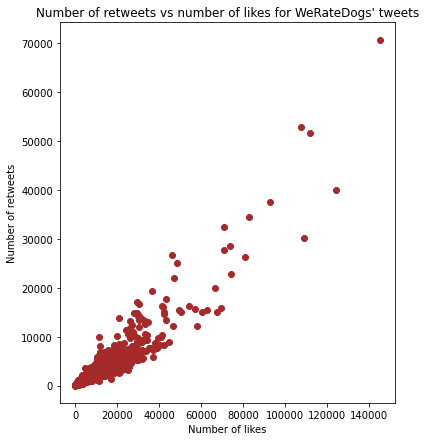

In [75]:
# scatter plot of number of likes and retweets
master_df = pd.read_csv('twitter_archive_master.csv')
x = master_df['favorite_count']
y = master_df['retweet_count']

plt.figure(figsize=(6,7))
plt.scatter(x,y, color = "brown")

plt.xlabel("Number of likes")
plt.ylabel("Number of retweets")
plt.title("Number of retweets vs number of likes for WeRateDogs' tweets")

From the above plot, there is a linear, positive relationship between likes and retweets. Tweets with high number of likes are generally likely to have a high number of retweets.
### 4. Top Ten Rated Dogs
The dataframe is sorted with the `rating_numerator` in descending order and the top ten rated tweets are selected.

*Where dogs are unnamed, the dog breed or tweet id is used as proxy.*

In [76]:
# sort dataframe by ratings
ratings = master_df.sort_values(by='rating_numerator', axis=0, ascending=False, ignore_index=True)

In [77]:
# select tweet id, name, rating, dog breed, and jpg url columns
ratings = ratings.loc[:,['tweet_id','name','rating_numerator','dog_breed','jpg_url']]

In [78]:
# select top ten rows
top_rated = ratings.iloc[0:10]
top_rated

,tweet_id,name,rating_numerator,dog_breed,jpg_url
0,749981277374128128,Atticus,1776,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1,670842764863651840,NaN,420,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
2,786709082849828864,Logan,75,Pomeranian,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
3,778027034220126208,Sophie,27,clumber,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
4,680494726643068929,NaN,26,kuvasz,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg
5,841439858740625411,NaN,14,Labrador_retriever,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg
6,884441805382717440,NaN,14,Pembroke,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg
7,828381636999917570,Doobert,14,Bedlington_terrier,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg
8,742465774154047488,NaN,14,NaN,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg
9,828650029636317184,NaN,14,golden_retriever,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg


In [79]:
# save the top ten rated images
k = list(range(10))
rated_folder = 'top_rated'
if not os.path.exists(rated_folder):
    os.makedirs(rated_folder)
for k in list(top_rated.index.values):
    rated_url = top_rated['jpg_url'][k]
    rated = requests.get(rated_url)
    rated_im = Image.open(BytesIO(rated.content))
    rated_im.save(rated_folder + "/" + "rated_" + str(k) + "." + 'jpg')

The top rated dogs are, respectively, **Atticus, tweet id:670842764863651840, Logan, Sophie, a kuvasz, a labrador retriever, a pembroke, Doobert, tweet id:742465774154047488, and a golden retriever.** Their pictures are shown in the insights report.
### 5. Top Five Dog Breeds with High Number of Likes
To answer this question, observations with likes higher than the mean number of likes are selected. These observations are grouped by the dog breed and are sorted from highest to lowest based on the breed with the highest number of likes.

In [81]:
# check the mean number of likes
master_df['favorite_count'].mean()

7725.525673614641

In [82]:
# select rows with likes equal to or greater than the mean
high_likes = master_df.query('favorite_count >= 7725.525673614641')

In [83]:
# group by dog breed; select and sort by the number of likes
liked_breeds = high_likes.groupby(['dog_breed'])[['favorite_count']].count().sort_values(by='favorite_count',ascending=False)

In [84]:
# top five dog breeds
five_liked_breeds = liked_breeds.iloc[0:5]
five_liked_breeds

,favorite_count
dog_breed,
golden_retriever,76
Labrador_retriever,41
Pembroke,36
Chihuahua,24
Samoyed,17


Text(0.5, 1.0, 'Top Five Liked Dog Breeds')

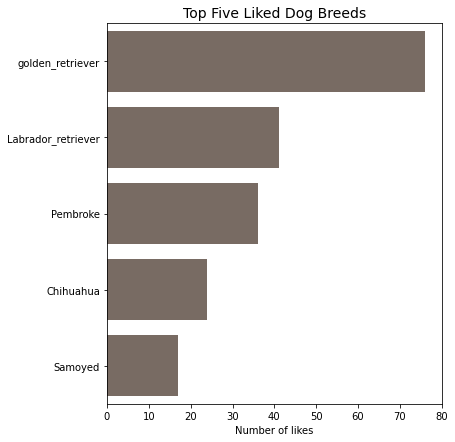

In [85]:
# define plot size
plt.figure(figsize=(6,7))

# define x-axis
likes = five_liked_breeds.favorite_count

# define y-axis
breed = five_liked_breeds.index

# plot bar chart
sns.barplot(x=likes, y=breed, color='#7B6A60')
plt.xlim(0,80)
plt.ylabel("")
plt.xlabel("Number of likes")
plt.title("Top Five Liked Dog Breeds", fontdict={'fontsize':14})